# Analysis of Bike Sharing Dataset

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from pylab import rcParams
from matplotlib import rc


## Original dataset

In [56]:
df_day = pd.read_csv('~/Downloads/Bike-Sharing-Dataset/day.csv')
df_hr = pd.read_csv('~/Downloads/Bike-Sharing-Dataset/hour.csv')

In [57]:
df_day=df_day[df_day['cnt']>50]
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [258]:
df_hr.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [58]:
df_day_1 = df_day[['yr','mnth','cnt']]
df_day_1= df_day_1.groupby(['yr','mnth']).sum()
df_day_1.reset_index(inplace=True)
#df_day_1

# Data Visualization

## Trend for bikes rental for the year 2011 and 2012

/Users/shreysharma/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


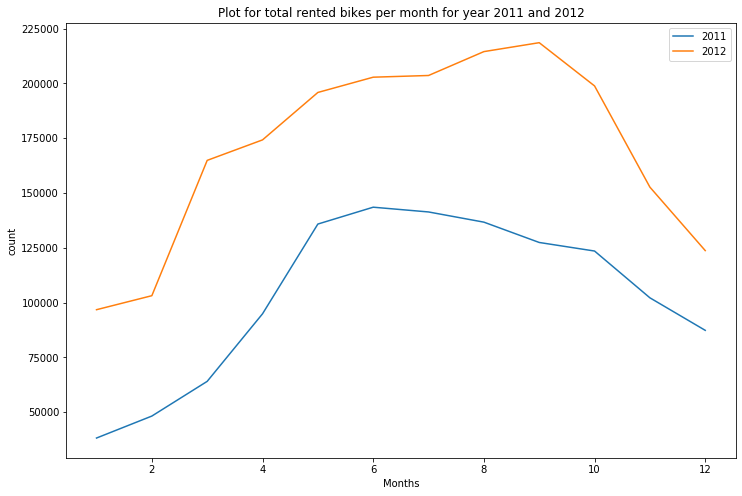

In [183]:
fig = plt.figure(figsize = (12,8))

ax1= fig.add_subplot(111)
ax1.plot('mnth','cnt',data = df_day_1[df_day_1['yr']==0])
ax1.set_xlabel("Months")
ax1.set_ylabel("count")
ax1.set_title("Plot for total rented bikes per month for year 2011 and 2012")

ax2 = fig.add_subplot(111)
ax2.plot('mnth','cnt',data = df_day_1[df_day_1['yr']==1])
ax2.legend(labels=('2011','2012'))
           

> The above plot shows the trend of rental bikes for year 2011 (blue) and year 2012 (orange). It can be seen that in 2012, usually between April and September, there's a hike in the count of rental bikes and then with Winter approaching, the rentals decreases gradually. 

In [381]:
count1, bin_edges1 = np.histogram(df_day[df_day['yr']==0]['windspeed'])
count2, bin_edges2 = np.histogram(df_day[df_day['yr']==1]['windspeed'])
print(count1)
print(bin_edges1)

[17 44 89 84 73 34 15  6  2  1]
[0.0223917  0.07089883 0.11940596 0.16791309 0.21642022 0.26492735
 0.31343448 0.36194161 0.41044874 0.45895587 0.507463  ]


## Histogram for variation in windspeed for both the years.

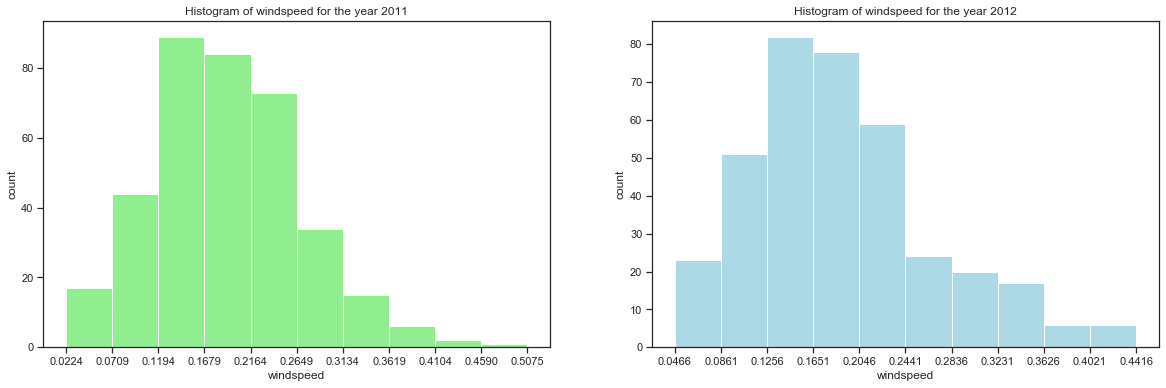

In [404]:
fig = plt.figure()

ax1 = fig.add_subplot(121)
ax1=df_day[df_day['yr']==0]['windspeed'].plot(kind='hist', figsize=(20,6), xticks=bin_edges1,color='lightgreen')

ax1.set_title('Histogram of windspeed for the year 2011') 
ax1.set_ylabel('count') 
ax1.set_xlabel('windspeed') 

ax2=fig.add_subplot(122)
ax2= df_day[df_day['yr']==1]['windspeed'].plot(kind='hist', figsize=(20, 6), xticks=bin_edges2,color='lightblue')
ax2.set_title('Histogram of windspeed for the year 2012') 
ax2.set_ylabel('count') 
ax2.set_xlabel('windspeed') 
plt.show()

> The above histogram shows the trend of the windspeed in years 2011 and 2012. Windspeed is negatively correlated with the total rental. So at higher windspeeds, people don't prefer taking bikes for rent. This plot can be used to have an idea about the variation in windspeed for the given years.

In [59]:
df_season = df_day[['season','cnt']]
df_season= df_season.groupby(['season']).sum()
df_season

,cnt
season,
1,471348
2,918589
3,1061129
4,841591


## Pie chart showing the distribution of bike rentals per season.

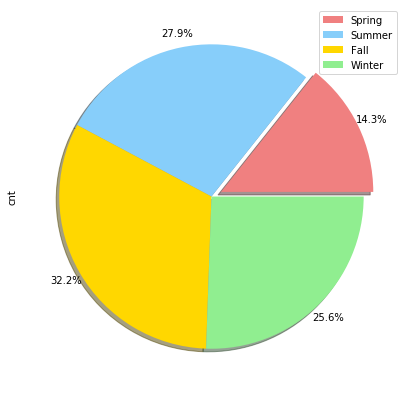

In [173]:
ex_list=[0.07,0,0,0]
colors_list = ['lightcoral', 'lightskyblue', 'gold', 'lightgreen']
label=['Spring','Summer','Fall','Winter']
df_season['cnt'].plot(kind='pie',figsize=(9,7),
                  autopct='%1.1f%%',
                  shadow=True,
                  labels=None,
                  pctdistance=1.1,
                 colors=colors_list,
                 explode=ex_list)
plt.legend(labels=label,loc='upper right')
plt.show()


> From the above pie chart, it can be observed that in comparision to other seasons, in Spring the bike rentals is quite less which accounts for about 14% of the overall rental counts. Whereas, Fall has been a season with most bikes rented, which is about 32% of the total counts.

## Total count of bike rentals per month for 2011 and 2012

In [6]:
import seaborn as sns

df_hr['mnth']=df_hr.mnth.map({1:'January', 2:'February', 3:'March', 4:'April',5:'May',6:'June',7:'July',8:'August',
                             9:'September',10:'October',11:'November',12:'December'})

sns.set(style="ticks")
sns.set(rc={'figure.figsize':(500,100)})
g = sns.relplot(x='hr', y='cnt', hue='mnth', data=df_hr,col='mnth',kind='line',
               legend='full')
g.fig.suptitle('Bike Rentals at Different hours of the Day\nBy Month',position=(0.5,1.05))
g.set_xlabels("Hours of the day")
g.set_ylabels("Count of\nTotal Bike Rentals")


'\nsns.set(style="ticks")\nsns.set(rc={\'figure.figsize\':(500,100)})\ng = sns.relplot(x=\'hr\', y=\'cnt\', hue=\'mnth\', data=df_hr,col=\'mnth\',kind=\'line\',\n               legend=\'full\')\ng.fig.suptitle(\'Bike Rentals at Different hours of the Day\nBy Month\',position=(0.5,1.05))\ng.set_xlabels("Hours of the day")\ng.set_ylabels("Count of\nTotal Bike Rentals")\n'

> The above plot shows the total count of bike rentals per month for both the year combined with respect to each hour of a day. With this, we can easily determine the hour of a day in a month where people rented more bikes.

## Relation between real feel temperature and rental bikes count

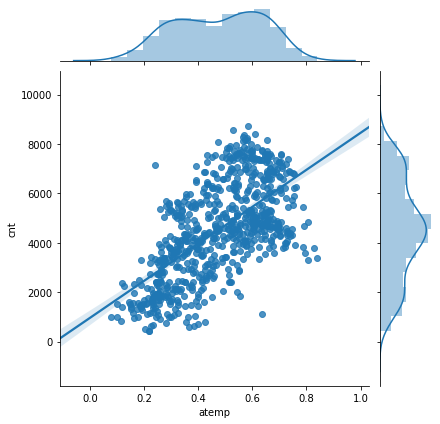

In [185]:
sns.jointplot(x="atemp", y="cnt", data=df_day, kind="reg")

> The above plot shows that real feels temperature and the bike rentals count have a positive linear relationship i.e higher normalized temperature leads to more counts of rented bikes.

## Bike rentals distrbution according to weekdays 

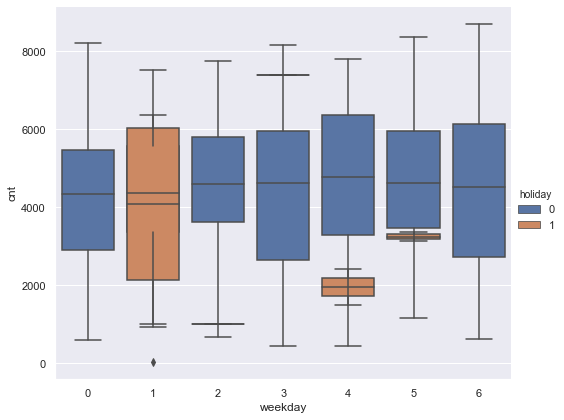

In [291]:
sns.catplot(x="weekday", y="cnt", hue="holiday", 
            kind='box',dodge=False, data=df_day,height=6, aspect=11/9)

> From the above boxplot it can be observed that although the average bike rentals has been more or less same for all days of the week but for weekday 6, there has been a maximum rentals and it's a non-holiday. It can also be observed that people have rented bikes mostly on non-holidays in a week. 

## Total count of bike rentals in different seasons as per variation in weather situations

In [9]:
sns.set_style('ticks')
df_day['season']=df_day.season.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})
df_day['weathersit']= df_day.weathersit.map({0:'Clear, Few clouds, Partly cloudy',1:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'
                                             ,2:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'
                                            ,3:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'})

g = sns.relplot(x='temp', y='cnt', hue='weathersit', data=df_day,
                col='season',
                height=4, aspect=1.6)

g.fig.suptitle('Bike Rentals at Different Temperatures and weather situations\nBy Season' ,position=(0.5,1.1), fontweight='bold')
g.set_xlabels("Normalized Temperature")
g.set_ylabels("Count of\nTotal Bike Rentals")


'\ng = sns.relplot(x=\'temp\', y=\'cnt\', hue=\'weathersit\', data=df_day,\n                col=\'season\',\n                height=4, aspect=1.6)\n\ng.fig.suptitle(\'Bike Rentals at Different Temperatures and weather situations\nBy Season\' ,position=(0.5,1.1), fontweight=\'bold\')\ng.set_xlabels("Normalized Temperature")\ng.set_ylabels("Count of\nTotal Bike Rentals")\n'

> The above plot shows the total count of bike rentals in different seasons and variations in weather situations. For spring and summer season the count of rental bikes is linearly proportional with the noramlized temperature and have  less rentals due to Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog in comparision to other weather situations. For Fall season, since the relationship is quite non-discernible but has most rental counts in Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist weather conditions. For winter, it has a quadratic non-linear realtionship with mostly Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds.

In [60]:
df_day.set_index('dteday',inplace=True)
df_day

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,727,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
2012-12-28,728,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
2012-12-29,729,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341


# Time series Analysis

## Test for staionarity of given time series data

Results of dickey fuller test
Test Statistics                 -1.817991
p-value                          0.371567
No. of lags used                13.000000
Number of observations used    716.000000
critical value (1%)             -3.439516
critical value (5%)             -2.865585
critical value (10%)            -2.568924
dtype: float64


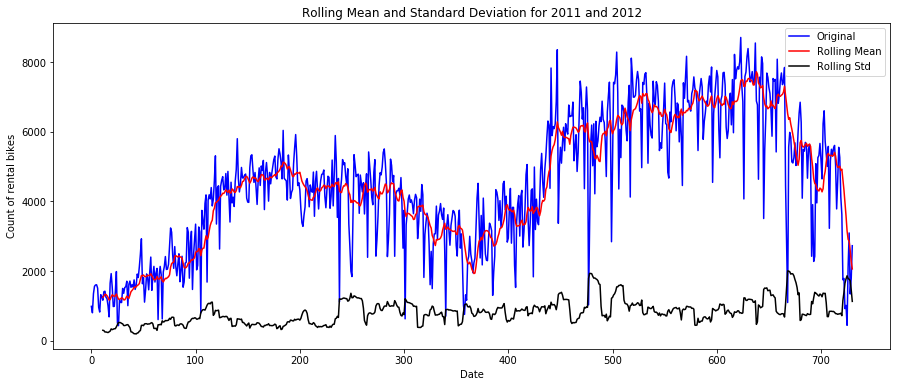

In [186]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    #Plot rolling statistics:
    fig=plt.figure(figsize=(15,6))
    plt.plot(timeseries,color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.xlabel('Date')
    plt.ylabel('Count of rental bikes')
    plt.title('Rolling Mean and Standard Deviation for 2011 and 2012')
    #plt.show(block=False)
   
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
    
test_stationarity(df_day['cnt'])

> Since both mean and standard deviation are not flat lines(constant mean and constant variance), the series is non-stationary.
ADF (Augmented Dickey-Fuller) Test was performed on the above data. It is used to determine the presence of unit root in the series, and hence helps to understand if the series is stationary or not. The null and alternate hypothesis of this test is:
Null Hypothesis: The series has a unit root (value of a =1)
Alternate Hypothesis: The series has no unit root.
Here, we fail to reject the null hypothesis, so, we can say that the series is non-stationary.

> The p-value is greater than 0.05, so we cannot reject the null hypothesis and can say that the series in non-stationary.

## Seperating trend and seasonality from time series

<Figure size 720x432 with 0 Axes>

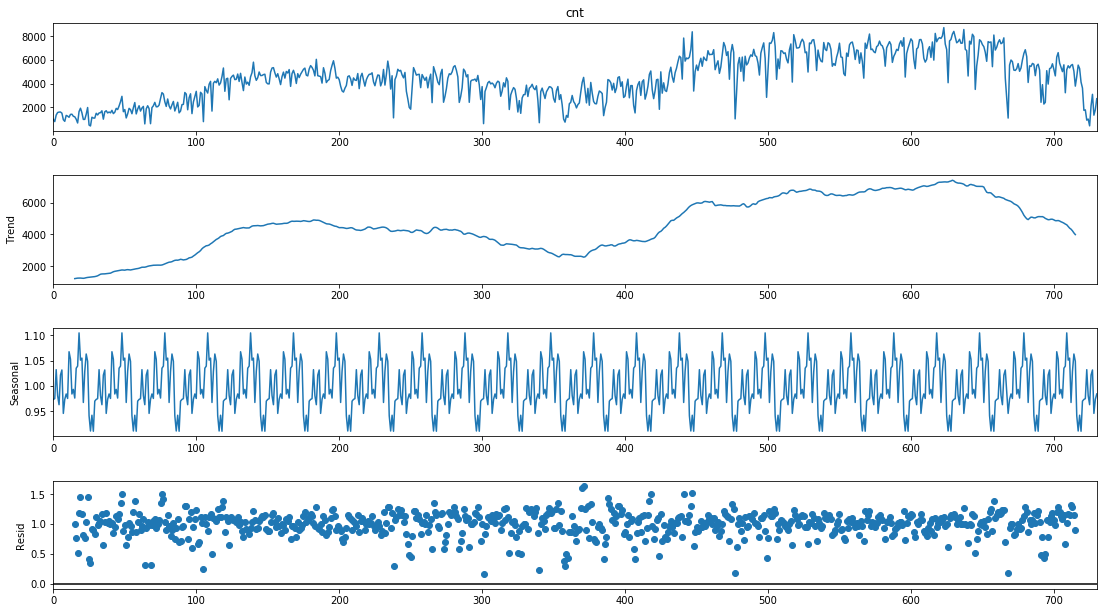

In [45]:
result = seasonal_decompose(df_day['cnt'], model='multiplicative', period = 30)
fig=plt.figure()
fig = result.plot() 
fig.set_size_inches(16, 9)

> The above plot shows the observed, trend, seasonal and residual plots of the dataset. In order to reduce the rising trend in the series we take the log of the count attribute so that the magnitude reduces and lies in a particular range.

## Plot for Rolling Mean and Standard deviation

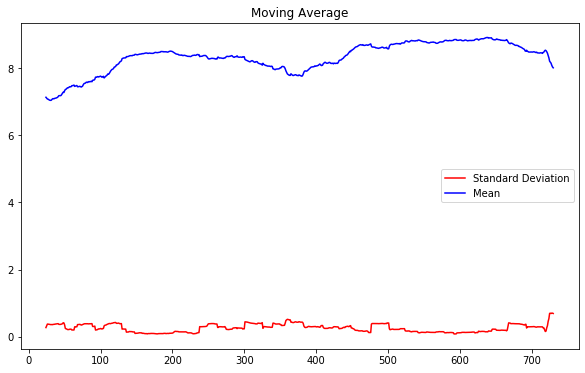

In [69]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_day['cnt'])

moving_avg = df_log.rolling(25).mean()

std_dev = df_log.rolling(25).std()

plt.title('Moving Average')
plt.plot(std_dev, color ="red", label = "Standard Deviation")
plt.plot(moving_avg, color="blue", label = "Mean")
plt.legend()
plt.show()

> Rolling mean and standard deviation has been calculated and shown in the above plot. The graph displays one-sided moving averages with a length of each day for year 2011 and 2012. Moving averages removes the seasonal pattern and makes the underlying trend visible. Each moving average point is the daily average of the past day. We can look at any date. We can see that the trend increases for April to September for both the years and then starts decling by the end of each year which marks the less count of bike rentals in winter.

## Correlation matrix 

The matrix below gives the correlation coefficients between each feature of the original dataset.

In [184]:
rs = np.random.RandomState(0)
corr = df_day.corr()
corr.style.background_gradient(cmap='coolwarm')

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.410661,0.865874,0.495765,0.016505,0.001942,-0.005679,-0.027457,0.151396,0.153279,0.012948,-0.117407,0.278353,0.667620,0.636602
season,0.410661,1.000000,-0.003704,0.831192,-0.010231,-0.001233,0.011242,0.013844,0.335319,0.343717,0.202849,-0.234111,0.213177,0.418034,0.412430
yr,0.865874,-0.003704,1.000000,-0.003177,0.008195,-0.004103,-0.002945,-0.053111,0.048054,0.046433,-0.113395,-0.014837,0.250665,0.600087,0.572372
mnth,0.495765,0.831192,-0.003177,1.000000,0.019443,0.010902,-0.006847,0.039720,0.220792,0.227921,0.220383,-0.211321,0.124927,0.298030,0.284421
holiday,0.016505,-0.010231,0.008195,0.019443,1.000000,-0.102267,-0.252948,-0.034137,-0.028629,-0.032559,-0.015554,0.006824,0.054041,-0.109706,-0.069149
weekday,0.001942,-0.001233,-0.004103,0.010902,-0.102267,1.000000,0.036755,0.035347,-0.000584,-0.007836,-0.049955,0.017307,0.058339,0.054423,0.064563
workingday,-0.005679,0.011242,-0.002945,-0.006847,-0.252948,0.036755,1.000000,0.058826,0.052962,0.052400,0.022734,-0.020887,-0.517599,0.307322,0.063566
weathersit,-0.027457,0.013844,-0.053111,0.039720,-0.034137,0.035347,0.058826,1.000000,-0.120104,-0.121445,0.588665,0.031053,-0.244084,-0.253425,-0.290843
temp,0.151396,0.335319,0.048054,0.220792,-0.028629,-0.000584,0.052962,-0.120104,1.000000,0.991706,0.127981,-0.157563,0.543374,0.541098,0.628887
atemp,0.153279,0.343717,0.046433,0.227921,-0.032559,-0.007836,0.052400,-0.121445,0.991706,1.000000,0.140816,-0.183603,0.544085,0.545559,0.632732


## Feature selection on the basis of correlation matrix

In [61]:
df_day_filtered = df_day[['season','temp','atemp','cnt']]
#df_day_filtered=df_day_filtered.set_index('dteday')
df_day_filtered.shape

(730, 4)

## Lag Plot

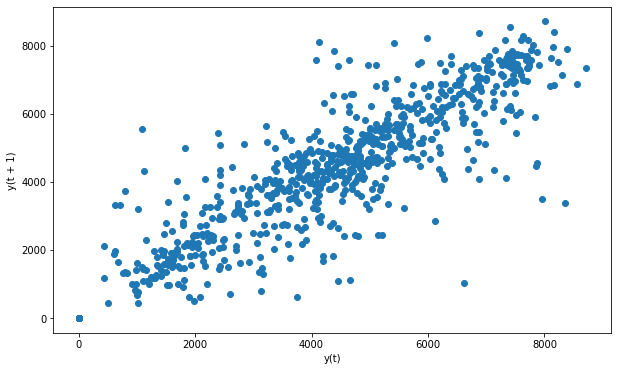

In [188]:
from matplotlib import pyplot
from pandas.plotting import lag_plot 
lag_plot(df_day_filtered)
pyplot.show()

> This lag plot of the bike sharing data exhibits a linear pattern. This shows that the data are strongly non-random and further suggests that an autoregressive model might be appropriate.

## Stationarity of time series

In [47]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [62]:
for name, column in df_day_filtered.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "season" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.2135
 No. Lags Chosen       = 0
 Critical value 1%     = -3.439
 Critical value 5%     = -2.866
 Critical value 10%    = -2.569
 => P-Value = 0.2014. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "temp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.9658
 No. Lags Chosen       = 6
 Critical value 1%     = -3.439
 Critical value 5%     = -2.866
 Critical value 10%    = -2.569
 => P-Value = 0.3017. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "atemp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit

## Making time series stationary

## Series transformation

A difference transform is a simple way for removing a systematic structure from the time series. The trend will be removed by subtracting the previous value from each value in the series which is the first order differencing. To keep it simple, I have performed first order differencing or seasonal differencing.

In [110]:
data_log = np.log(df_day_filtered)
data_log_diff =data_log.diff().dropna()
data_log_diff.describe()

,season,temp,atemp,cnt
count,729.000000,729.000000,729.000000,729.000000
mean,0.000000,-0.000640,-0.000668,0.001398
std,0.085315,0.168197,0.173241,0.341183
min,-1.386294,-1.099225,-0.993570,-1.864057
25%,0.000000,-0.060758,-0.055107,-0.107466
50%,0.000000,0.006529,0.008425,0.011297
75%,0.000000,0.072823,0.072600,0.121697
max,0.693147,0.905377,0.936014,1.670081


Since from the above ADF test, we got to know that the series is non-stationary, so ADF test was performed once again but this time on the transformed series to make it stationary by checking the p-value. 

In [64]:
for name, column in data_log_diff.iteritems():
    adfuller_test(column, name=column.name)

    print('\n')

    Augmented Dickey-Fuller Test on "season" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -26.9444
 No. Lags Chosen       = 0
 Critical value 1%     = -3.439
 Critical value 5%     = -2.866
 Critical value 10%    = -2.569
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "temp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.6405
 No. Lags Chosen       = 15
 Critical value 1%     = -3.44
 Critical value 5%     = -2.866
 Critical value 10%    = -2.569
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "atemp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0

Now, all the series are stationary.

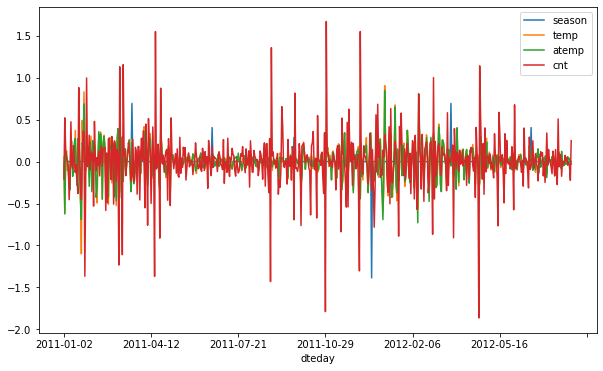

In [381]:
X_train_log_diff.plot()

## Splitting original data into train and test data

In [111]:
train_size = int(len(data_log_diff) * 0.8)
test_size = len(data_log_diff) - train_size
train, test = data_log_diff.iloc[0:train_size], data_log_diff.iloc[train_size:len(data_log_diff)]
print(len(train), len(test))
test.head()

583 146


,season,temp,atemp,cnt
dteday,,,,
2012-08-07,0.0,-0.022398,-0.017935,0.036403
2012-08-08,0.0,0.019070,0.014368,0.035257
2012-08-09,0.0,0.007747,-0.011667,-0.033471
2012-08-10,0.0,-0.054374,-0.046176,-0.230513
2012-08-11,0.0,-0.033139,-0.045445,0.084950


> To check the stationarity of the time series, the transformed series has been plotted. It can be seen that now the time series is stationary.

## Applying Machine Learning Algorithms

## 1. ARIMA 

### Determining optimal parameters using Auto_Arima model

In [608]:
model_autoARIMA = auto_arima(train['cnt'], start_p=0, start_q=0,      
                      test='adf'       ,# using adftest to find optimal 'd'
                      max_p=5, max_q=5,# maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=352.846, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=289.483, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=208.315, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=189.698, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=191.585, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=191.581, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=190.241, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=255.086, Time=0.04 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=192.260, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=188.704, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=208.716, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=291.376, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=190.632, Time=0.56 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=190.628, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=354.8

> __Auto-Regressive (p)__ -> Number of autoregressive terms , optimal value is 1 as per auto_arima function. 
__Integrated (d)__ -> Number of nonseasonal differences needed for stationarity , optimal value 0
__Moving Average (q)__ -> Number of lagged forecast errors in the prediction equation, optimal value 1

In the Auto ARIMA model, the small p,d,q values represent non-seasonal components, and capital P, D, Q represent seasonal components. It works similarly like hyper tuning techniques to find the optimal value of p, d, and q with different combinations.

## Plot summarization as per the Auto_ARIMA model

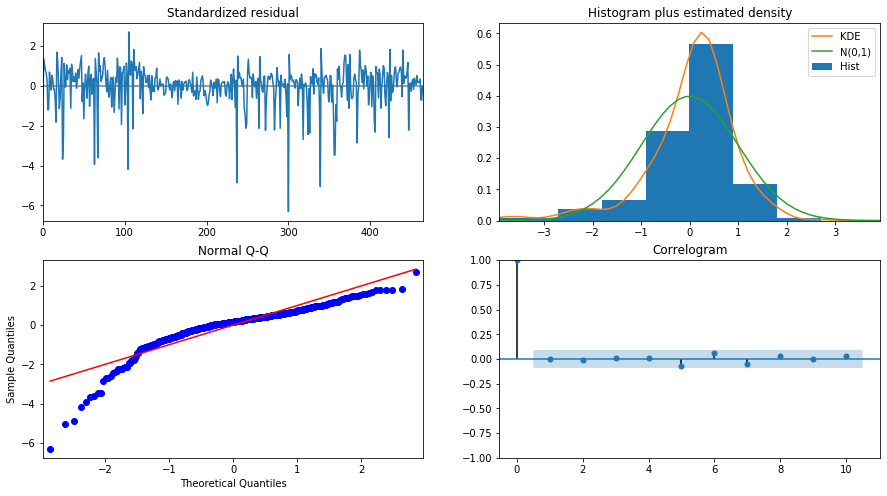

In [609]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

> __Plot summarization of auto arima model.__

## Training ARIMA model with optimal parameters

predicted=0.147671, expected=0.106614
predicted=0.066196, expected=0.167921
predicted=-0.045984, expected=0.153570
predicted=-0.137010, expected=-0.044964
predicted=-0.090963, expected=-0.112992
predicted=-0.006242, expected=0.049164
predicted=-0.034419, expected=-0.426687
predicted=0.245573, expected=0.407676
predicted=-0.039367, expected=0.104751
predicted=-0.099907, expected=-0.095804
predicted=-0.025107, expected=-1.864057
predicted=1.181437, expected=1.140874
predicted=0.324234, expected=0.561126
predicted=-0.066908, expected=0.095262
predicted=-0.117962, expected=-0.209279
predicted=0.030970, expected=0.215233
predicted=-0.108171, expected=-0.390023
predicted=0.156499, expected=0.401349
predicted=-0.116527, expected=-0.123430
predicted=-0.022316, expected=0.029705
predicted=-0.036846, expected=0.072078
predicted=-0.077274, expected=0.040037
predicted=-0.092810, expected=-0.019659
predicted=-0.068181, expected=0.089140
predicted=-0.116386, expected=-0.079183
predicted=-0.050897, e

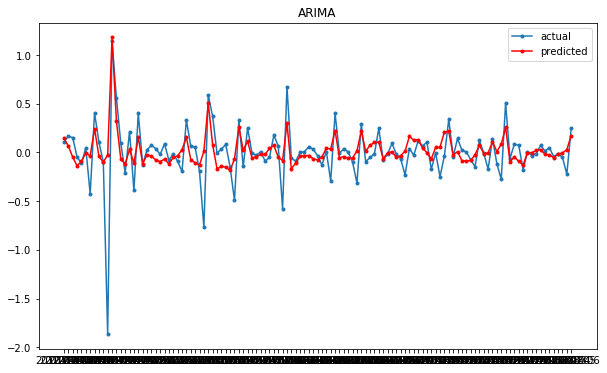

In [661]:
history = [x for x in train['cnt']]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history,order=(1,0,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test['cnt'][t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# plot
plt.title('ARIMA')
plt.plot(test['cnt'],label='actual',marker='.')
plt.plot(predictions, color='red',label='predicted',marker='.')
plt.legend(loc='best')
plt.show()

In [2]:
from math import sqrt
error = sqrt(mean_squared_error(test['cnt'], predictions))
print('Test RMSE: %.3f' % error)

NameError: name 'mean_squared_error' is not defined

## 2. LSTM

In [112]:
def split_data(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [113]:
time_steps = 10

# reshape to [samples, time_steps, n_features]

X_train, y_train = split_data(train, train['cnt'], time_steps)
X_test, y_test = split_data(test, test['cnt'], time_steps)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(573, 10, 4) (573,)
(136, 10, 4) (136,)


## Training the LSTM 

In [128]:
RANDOM_SEED = 40

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

model = keras.Sequential()
#LSTM
model.add(keras.layers.LSTM(
  units=64,
  input_shape=(X_train.shape[1], X_train.shape[2])
))
#Dense Layer
model.add(keras.layers.Dense(units=1))
model.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.001)
)

## Model fitting

In [129]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=15,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Train on 515 samples, validate on 58 samples
Epoch 1/20
515/515 [==============================] - 2s 4ms/sample - loss: 0.1232 - val_loss: 0.0232
Epoch 2/20
515/515 [==============================] - 0s 564us/sample - loss: 0.1124 - val_loss: 0.0213
Epoch 3/20
515/515 [==============================] - 0s 528us/sample - loss: 0.1039 - val_loss: 0.0204
Epoch 4/20
515/515 [==============================] - 0s 525us/sample - loss: 0.0971 - val_loss: 0.0191
Epoch 5/20
515/515 [==============================] - 0s 562us/sample - loss: 0.0925 - val_loss: 0.0181
Epoch 6/20
515/515 [==============================] - 0s 549us/sample - loss: 0.0897 - val_loss: 0.0190
Epoch 7/20
515/515 [==============================] - 0s 534us/sample - loss: 0.0877 - val_loss: 0.0175
Epoch 8/20
515/515 [==============================] - 0s 535us/sample - loss: 0.0864 - val_loss: 0.0175
Epoch 9/20
515/515 [==============================] - 0s 562us/sample - loss: 0.0858 - val_loss: 0.0171
Epoch 10/20
515/515 [

## Variation in loss for train and test data with respect to the number of epochs

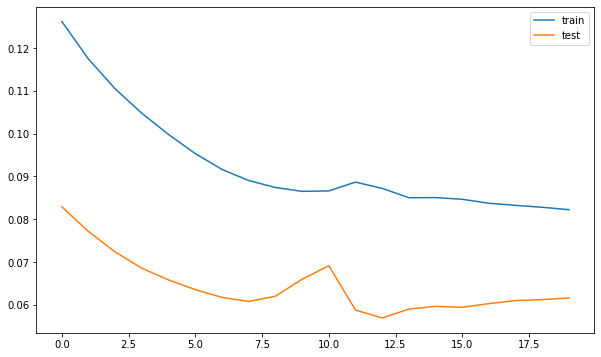

In [575]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

## Prediction using the trained LSTM 

In [130]:
y_pred = model.predict(X_test)

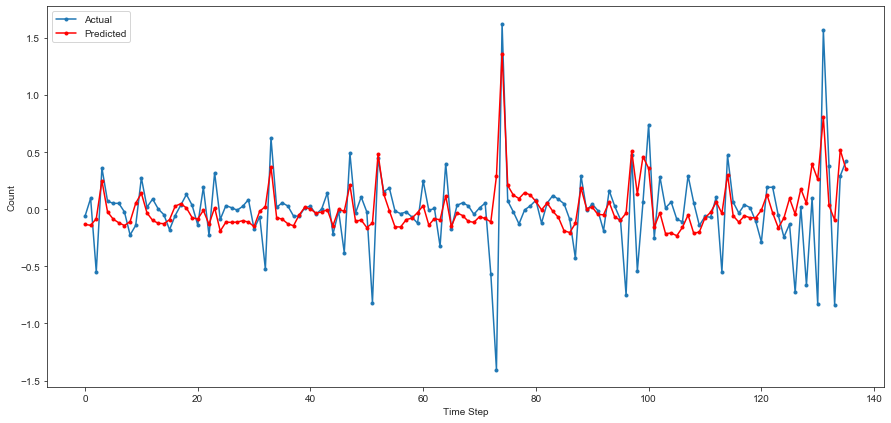

In [131]:
plt.figure(figsize=(15,7))
plt.plot(y_test,marker='.',label='Actual')
plt.plot(y_pred,marker='.',label='Predicted',color='red')
plt.ylabel('Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [132]:
rmse_lstm = sqrt(mean_squared_error(y_test,y_pred))
print('Test RMSE: %.3f' % rmse_lstm)

Test RMSE: 0.294


## 3. Auto-regression (AR) model

Coefficients: [ 0.01288855 -0.62742798 -0.59035151 -0.49292928 -0.45094609 -0.47025778
 -0.33695969 -0.36439541 -0.28104914 -0.32682214 -0.26295674 -0.28492205
 -0.25932573 -0.21229042 -0.23270859 -0.15555525 -0.19224803 -0.09036331
 -0.05260169 -0.04893789 -0.03507714 -0.00088731 -0.02122879 -0.06598033
  0.0263138  -0.01993878  0.14048682  0.13427754  0.15469716  0.16299021
  0.07510969  0.05109942 -0.02786671  0.08201005  0.03946656  0.08249123
  0.08931094  0.10516469  0.08084699  0.19362272  0.09132422  0.17199096
  0.12901574  0.141856    0.06567819  0.01792764  0.08387069  0.09855192
  0.09401867  0.0719997   0.03142867  0.03862774 -0.03316728  0.00550739
 -0.0559071  -0.06318632]
predicted=0.082922, expected=0.106614
predicted=0.197752, expected=0.167921
predicted=-0.056811, expected=0.153570
predicted=0.010744, expected=-0.044964
predicted=0.081422, expected=-0.112992
predicted=-0.049606, expected=0.049164
predicted=0.076218, expected=-0.426687
predicted=0.016431, expected=0.4

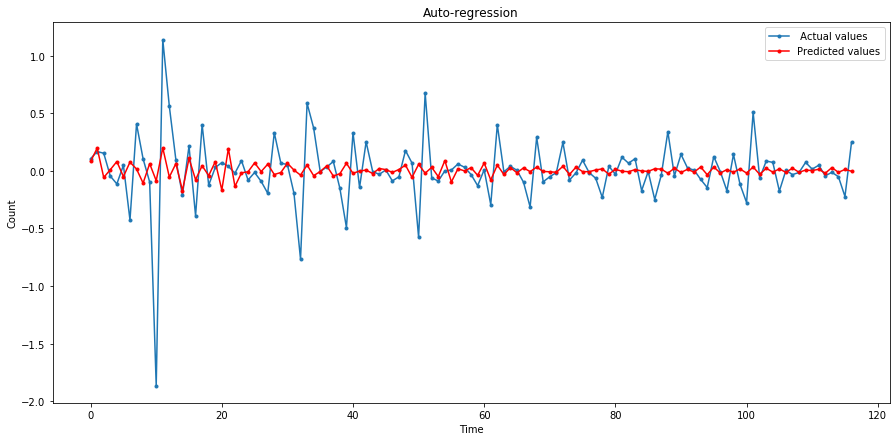

In [596]:
from math import sqrt
# split dataset
X = data_log_diff['cnt'].values
train1, test1 = X[0:train_size], X[train_size:len(X)]

# train autoregression
model = AutoReg(train1, lags=55)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train1),end=len(train1)+len(test1)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test1[i]))

rmse_ar = sqrt(mean_squared_error(test1, predictions))
print('Test RMSE: %.3f' % rmse_ar)

# plot results
plt.figure(figsize=(15,7))
plt.title('Auto-regression')
plt.plot(test1,label=' Actual values',marker='.')
plt.plot(predictions, color='red',label='Predicted values',marker='.')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend(loc='best')
pyplot.show()

> The test RMSE for Auto-regression model was found to be 0.285

## 4. Vector Auto-regression (VAR) model

In [633]:
model = VAR(train)
x = model.select_order(maxlags=15)
x.summary()

/Users/shreysharma/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


,AIC,BIC,FPE,HQIC
0,-16.29,-16.25,8.454e-08,-16.27
1,-16.93,-16.74,4.456e-08,-16.85
2,-17.09,-16.76*,3.795e-08,-16.96
3,-17.18,-16.71,3.449e-08,-17.00
4,-17.25,-16.63,3.235e-08,-17.00*
5,-17.27,-16.50,3.174e-08,-16.96
6,-17.25,-16.34,3.229e-08,-16.89
7,-17.29,-16.24,3.086e-08,-16.88
8,-17.29,-16.08,3.114e-08,-16.81
9,-17.27,-15.92,3.161e-08,-16.74


In [634]:
model_fitted = model.fit(14)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 25, Aug, 2020
Time:                     16:20:02
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -15.3523
Nobs:                     452.000    HQIC:                  -16.6096
Log likelihood:           1601.14    FPE:                2.71484e-08
AIC:                     -17.4273    Det(Omega_mle):     1.68821e-08
--------------------------------------------------------------------
Results for equation season
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              0.000686         0.003857            0.178           0.859
L1.season          0.034630         0.050007            0.693           0.489
L1.temp           -0.012889         0.110409           -0.117          

In [635]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  

# Input data for forecasting
forecast_input = train.values[-lag_order:]
forecast_input

14


array([[ 0.        ,  0.02044363,  0.02382269,  0.07356879],
       [ 0.        , -0.28937051, -0.24999396, -0.1164184 ],
       [ 0.        ,  0.13662424,  0.11573248,  0.13291296],
       [ 0.        ,  0.00392001, -0.0105389 , -0.03160902],
       [ 0.        ,  0.0187968 ,  0.02421046, -0.01753406],
       [ 0.        ,  0.07277189,  0.07646052,  0.13176096],
       [ 0.        ,  0.14903548,  0.14492013, -0.05088924],
       [ 0.        , -0.21930539, -0.21287914,  0.00325758],
       [ 0.        , -0.07558351, -0.09837473,  0.0004645 ],
       [ 0.        ,  0.08131418,  0.08663064,  0.05964071],
       [ 0.        ,  0.13353139,  0.14460005, -0.28259078],
       [ 0.        , -0.02190415, -0.03258487,  0.07740519],
       [ 0.        , -0.09089059, -0.08858079,  0.05791412],
       [ 0.        , -0.24761287, -0.25728085, -0.19654868]])

In [640]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=test_size)
df_forecast = pd.DataFrame(fc, index=test.index[-test_size:], columns=test.columns + '_pred')
df_forecast

,season_pred,temp_pred,atemp_pred,cnt_pred
dteday,,,,
2012-04-12,-0.014412,0.037930,0.073324,0.113071
2012-04-13,-0.009633,0.104306,0.113566,0.078474
2012-04-14,-0.005589,0.050318,0.017870,-0.023686
2012-04-15,-0.002277,0.005218,0.007298,0.025968
2012-04-16,0.004164,0.002787,0.010726,0.017224
...,...,...,...,...
2012-08-02,0.001511,0.001807,0.001727,0.003379
2012-08-03,0.001512,0.001791,0.001716,0.003370
2012-08-04,0.001515,0.001798,0.001725,0.003395


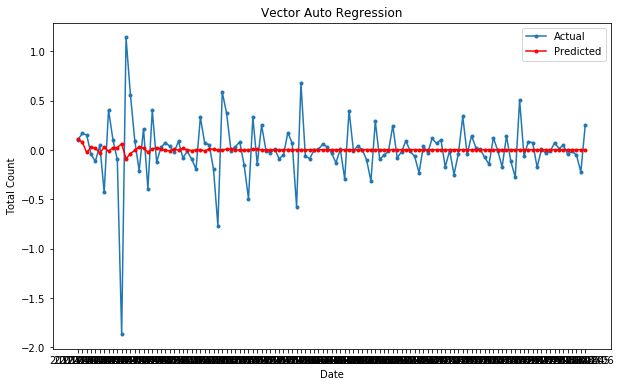

In [641]:
plt.plot(test['cnt'],label='Actual',marker='.')
plt.plot(df_forecast['cnt_pred'],label='Predicted',marker='.',color='red')
plt.xlabel('Date')
plt.ylabel('Total Count')
plt.title('Vector Auto Regression')
plt.legend(loc='best')
plt.show()

In [642]:
#Calculate forecast bias
forecast_errors = [test.cnt[i]- df_forecast['cnt_pred'][i] for i in range(len(test['cnt']))]
bias = sum(forecast_errors) * 1.0/len(test['cnt'])
print('Bias: %f' % bias)
#Calculate mean absolute error
mae = mean_absolute_error(test['cnt'],df_forecast['cnt_pred'])
print('MAE: %f' % mae)
#Calculate mean squared error and root mean squared error
rmse_var = sqrt(mean_squared_error(test['cnt'], df_forecast['cnt_pred']))
print('RMSE: %f' % rmse_var)

Bias: -0.001754
MAE: 0.170408
RMSE: 0.300555


## 5. Gaussian Process Regression

In [649]:
import sklearn.gaussian_process as gp

In [650]:
kernel = gp.kernels.ConstantKernel(2.0, (1e-1, 1e3)) * gp.kernels.RBF(0.1, (1e-3, 1e3))

model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=15, alpha=0.1, normalize_y=True)
model.fit(train[['season','temp','atemp']], train['cnt'])
params = model.kernel_.get_params()

In [651]:
params

{'k1': 0.955**2,
 'k2': RBF(length_scale=0.001),
 'k1__constant_value': 0.9118828521096602,
 'k1__constant_value_bounds': (0.1, 1000.0),
 'k2__length_scale': 0.0010000000000000002,
 'k2__length_scale_bounds': (0.001, 1000.0)}

In [652]:
y_pred_gpr, std = model.predict(test[['season','temp','atemp']],return_std=True)

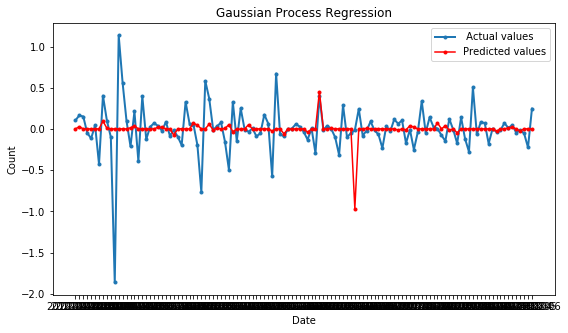

In [653]:
#plotting
plt.figure(figsize=(9,5))
plt.plot(test['cnt'],label=' Actual values',marker='.',linewidth=2)
plt.plot(y_pred_gpr, color='red',label='Predicted values',marker='.')
plt.title('Gaussian Process Regression')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(loc='best')
pyplot.show()

In [654]:
RMSE = sqrt(((y_pred_gpr - test['cnt'])**2).mean())
RMSE

0.3033047189396407

## Bidirectional LSTM

In [148]:
RANDOM_SEED = 40

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)
#fitting bidirectional LSTM 
model = keras.Sequential()
model.add(keras.layers.Bidirectional(keras.layers.LSTM(64),input_shape=(X_train.shape[1], X_train.shape[2]), merge_mode='concat'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')


In [149]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=15,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Train on 515 samples, validate on 58 samples
Epoch 1/30
515/515 [==============================] - 4s 7ms/sample - loss: 0.1160 - val_loss: 0.0210
Epoch 2/30
515/515 [==============================] - 0s 735us/sample - loss: 0.0936 - val_loss: 0.0168
Epoch 3/30
515/515 [==============================] - 0s 650us/sample - loss: 0.0895 - val_loss: 0.0164
Epoch 4/30
515/515 [==============================] - 0s 640us/sample - loss: 0.0886 - val_loss: 0.0166
Epoch 5/30
515/515 [==============================] - 0s 655us/sample - loss: 0.0878 - val_loss: 0.0165
Epoch 6/30
515/515 [==============================] - 0s 838us/sample - loss: 0.0872 - val_loss: 0.0162
Epoch 7/30
515/515 [==============================] - 1s 1ms/sample - loss: 0.0866 - val_loss: 0.0161
Epoch 8/30
515/515 [==============================] - 0s 691us/sample - loss: 0.0861 - val_loss: 0.0160
Epoch 9/30
515/515 [==============================] - 0s 646us/sample - loss: 0.0857 - val_loss: 0.0160
Epoch 10/30
515/515 [==

In [153]:
y_pred = model.predict(X_test)

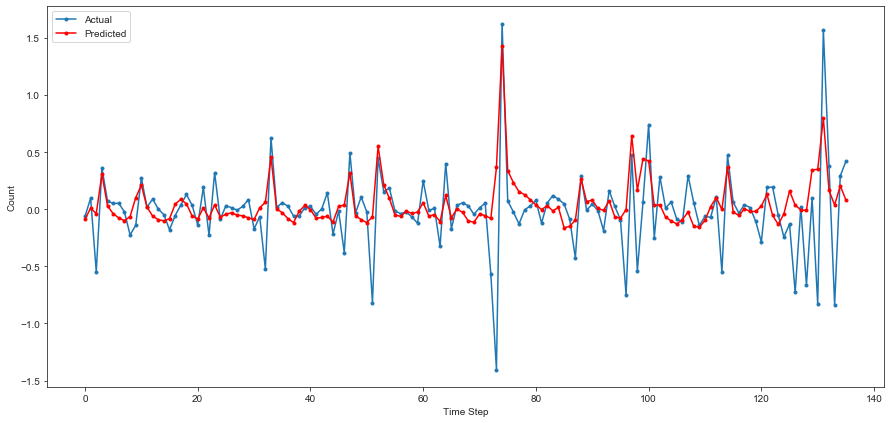

In [154]:
#plotting actual vs predicted values
plt.figure(figsize=(15,7))
plt.plot(y_test,marker='.',label='Actual')
plt.plot(y_pred,marker='.',label='Predicted',color='red')
plt.ylabel('Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [155]:
from math import sqrt
rmse_bi_lstm = sqrt(mean_squared_error(y_test,y_pred))
print('Test RMSE: %.3f' % rmse_bi_lstm)

Test RMSE: 0.301


#### Cascaded bidirectional and unidirectional LSTM model

In [170]:
# Cascaded bidirectional and unidirectional model
model =keras.Sequential()
model.add(keras.layers.Bidirectional(keras.layers.LSTM(30, input_shape=(X_train.shape[1],X_train.shape[2]),return_sequences=True),merge_mode='concat'))
model.add(keras.layers.LSTM(64,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

In [171]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=15,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Train on 515 samples, validate on 58 samples
Epoch 1/30
515/515 [==============================] - 5s 9ms/sample - loss: 0.1207 - val_loss: 0.0222
Epoch 2/30
515/515 [==============================] - 1s 988us/sample - loss: 0.0974 - val_loss: 0.0174
Epoch 3/30
515/515 [==============================] - 1s 1ms/sample - loss: 0.0898 - val_loss: 0.0200
Epoch 4/30
515/515 [==============================] - 1s 1ms/sample - loss: 0.0907 - val_loss: 0.0227
Epoch 5/30
515/515 [==============================] - 1s 1ms/sample - loss: 0.0891 - val_loss: 0.0201
Epoch 6/30
515/515 [==============================] - 1s 1ms/sample - loss: 0.0864 - val_loss: 0.0191
Epoch 7/30
515/515 [==============================] - 1s 1ms/sample - loss: 0.0856 - val_loss: 0.0187
Epoch 8/30
515/515 [==============================] - 1s 1ms/sample - loss: 0.0850 - val_loss: 0.0185
Epoch 9/30
515/515 [==============================] - 1s 1ms/sample - loss: 0.0845 - val_loss: 0.0183
Epoch 10/30
515/515 [==============

In [172]:
y_pred = model.predict(X_test)

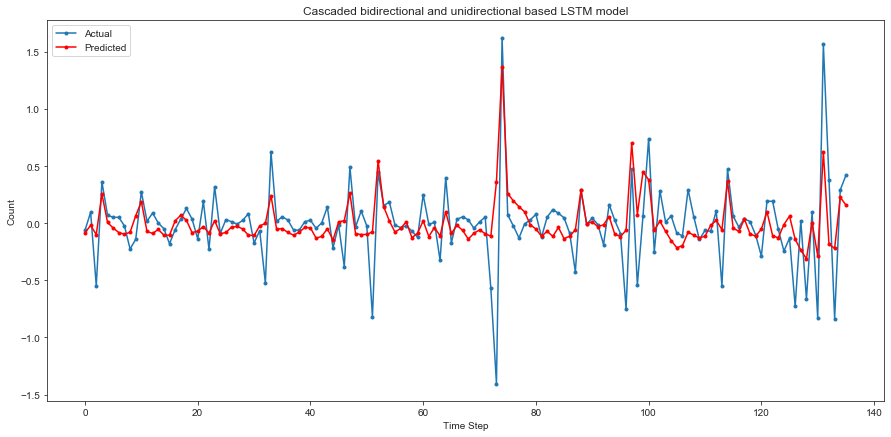

In [159]:
#plotting actual vs predicted values
plt.figure(figsize=(15,7))
plt.plot(y_test,marker='.',label='Actual')
plt.plot(y_pred,marker='.',label='Predicted',color='red')
plt.title('Cascaded bidirectional and unidirectional based LSTM model')
plt.ylabel('Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [160]:
from math import sqrt
rmse_cas_lstm = sqrt(mean_squared_error(y_test,y_pred))
print('Test RMSE: %.3f' % rmse_cas_lstm)

Test RMSE: 0.281


## Comparision of various Machine Learning models

Models| RMSE    |
----: |--------:| 
ARIMA | 0.239   |     
LSTM  | 0.294   |
AR    | 0.285   |
VAR   | 0.300   |
GPR   | 0.303   |
Bidirecitonal LSTM | 0.301 |
Cascaded bidirectional and unidirectional based LSTM | 0.281 |

As per the RMSE value calculated for each model, it could be observed that __ARIMA model__ showed minimum value for calcuated error among all the ML models with a Root Mean Square Error value of 0.239. So, for this dataset we can say that ARIMA model works best. 